<img src="https://d1vwxdpzbgdqj.cloudfront.net/s3-public-images/learning-partners/greatlearning-brand.png" style="float:right;" width=25%></img>

### The following is the description of the dataset that we are going to use for Two Way ANOVA.


<img src="https://albertapressleader.ca/wp-content/uploads/2020/12/kidney-dialysis.jpg" width = 45%></img>

### Problem Statement:

### The dose for effective dialysis depends on duration of treatment and weight gain between treatments. To study the effects of these two factors on the number of days hospitalized attributable to kidney failure, a random sample of 10 patients per group undergone treatment in a large dialysis facility was obtained. Treatment duration was at 3 levels: short, mid and long. Average weight gain between treatments during the year was categorized into three levels: mild, moderate and severe.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
df = pd.read_csv('Dialysis.csv')

In [3]:
df.head()

,Duration,Weight_Gain,Patient,Days
0,1,1,1,3
1,1,1,2,3
2,1,1,3,14
3,1,1,4,16
4,1,1,5,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Duration     90 non-null     int64
 1   Weight_Gain  90 non-null     int64
 2   Patient      90 non-null     int64
 3   Days         90 non-null     int64
dtypes: int64(4)
memory usage: 2.9 KB


In [5]:
df.Duration.unique()

array([1, 2, 3], dtype=int64)

In [6]:
df.Weight_Gain.unique()

array([1, 2, 3], dtype=int64)

In [7]:
df.Patient.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [8]:
df.Days.unique()

array([ 3, 14, 16,  7,  9,  8, 15, 22, 11,  6,  2, 10, 12,  5, 13, 21, 17,
       18,  4, 20, 19], dtype=int64)

**Now, let us go ahead and perform one way ANOVA with 'Weight Gain' with respect to 'Days'.**

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: $Mu_Wg$ = $Mu_days$
## $H_a$: $Mu_Wg$ and $Mu_days$ is not equal

In [9]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
pd.set_option('expand_frame_repr', False)
print(aov_table)

                  df       sum_sq    mean_sq         F    PR(>F)
C(Weight_Gain)   2.0     6.822222   3.411111  0.108508  0.897293
Residual        87.0  2734.966667  31.436398       NaN       NaN


**Let us now perform One Way ANOVA with the variable 'Duration' with respect to 'Days'.**

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: $Mu_Duration$ = $Mu_days$
## $H_a$: $Mu_Duration$ and $Mu_days$ is not equal.


In [11]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
pd.set_option('expand_frame_repr',False)
print(aov_table)

               df       sum_sq     mean_sq         F    PR(>F)
C(Duration)   2.0   326.955556  163.477778  5.889668  0.003991
Residual     87.0  2414.833333   27.756705       NaN       NaN


**Let us now perform the Two Way ANOVA. We will now analyse the effect of both the treatments on the 'Days' variable.**

In [12]:
formula = 'Days ~ C(Weight_Gain) + C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
pd.set_option('expand_frame_repr',False)
print(aov_table)

                  df       sum_sq     mean_sq         F    PR(>F)
C(Weight_Gain)   2.0     6.822222    3.411111  0.120408  0.886709
C(Duration)      2.0   326.955556  163.477778  5.770576  0.004467
Residual        85.0  2408.011111   28.329542       NaN       NaN


**Let us check whether there is any interaction effect between the treatments.**

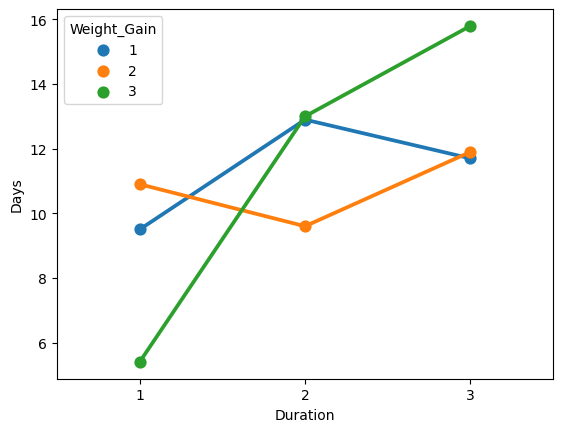

In [15]:
sns.pointplot(x='Duration', y='Days', data=df, hue='Weight_Gain', errorbar=None);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

In [16]:
formula = 'Days ~ C(Duration) + C(Weight_Gain) + C(Duration):C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
pd.set_option('expand_frame_repr',False)
print(aov_table)

                              df       sum_sq     mean_sq         F    PR(>F)
C(Duration)                  2.0   326.955556  163.477778  6.397884  0.002632
C(Weight_Gain)               2.0     6.822222    3.411111  0.133498  0.875222
C(Duration):C(Weight_Gain)   4.0   338.311111   84.577778  3.310045  0.014538
Residual                    81.0  2069.700000   25.551852       NaN       NaN


                                                                         ------ Happy Learning------